In [0]:
###############Author :Tan Haochen###############
###############Program:EIE#######################
###############Student ID: 55349692##############

First read the bank.csv which is download from the uci website,
The download link is [Bank Marketing Data Set ](https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip), After successfully download the dataset, we can drop the data with the NaN values out and reset the index. The code shown below, the result is the first 5 objects' data.

In [3]:
import pandas as pd
import seaborn as sns
df = pd.read_csv('./bank.csv', delimiter = ';', header = 0)
df = df.dropna()
df = df.reset_index()
df.head()

,index,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


We can see some detail infomation about all the data, like mean, min, max ,25th, 50th, 70th percentile

In [0]:
df.describe()

,index,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,2260.000000,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,1305.244613,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,0.000000,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,1130.000000,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,2260.000000,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,3390.000000,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,4520.000000,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


We can also sort the data by using sort_values to sort the data by any attribute





In [0]:
df.sort_values('age',ascending=False).head()

,index,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
3311,3311,87,retired,married,primary,no,230,no,no,cellular,30,oct,144,1,-1,0,unknown,yes
1866,1866,86,retired,married,secondary,no,1503,no,no,telephone,18,mar,165,3,101,1,other,no
4108,4108,84,retired,divorced,primary,no,639,no,no,telephone,18,may,353,3,-1,0,unknown,yes
4388,4388,83,retired,divorced,primary,no,1097,no,no,telephone,5,mar,181,1,-1,0,unknown,yes
633,633,83,retired,married,secondary,no,0,no,no,cellular,18,mar,140,10,-1,0,unknown,no


We can collect the data which get a Y atrribute and calculate its datas' mean and median

In [0]:
yGroup = df.groupby('y')
yGroup.mean()

,index,age,balance,day,duration,campaign,pdays,previous
y,,,,,,,,
no,2261.324500,40.998000,1403.211750,15.948750,226.347500,2.862250,36.006000,0.471250
yes,2249.831094,42.491363,1571.955854,15.658349,552.742802,2.266795,68.639155,1.090211


In [0]:
yGroup.median()

,index,age,balance,day,duration,campaign,pdays,previous
y,,,,,,,,
no,2270.5,39.0,419.5,16.0,167.0,2.0,-1.0,0.0
yes,2176.0,40.0,710.0,15.0,442.0,2.0,-1.0,0.0


We can also get one person's information from the whole dataset

In [0]:
df.iloc[0, :]

index                 0
age                  30
job          unemployed
marital         married
education       primary
default              no
balance            1787
housing              no
loan                 no
contact        cellular
day                  19
month               oct
duration             79
campaign              1
pdays                -1
previous              0
poutcome        unknown
y                    no
Name: 0, dtype: object

 Now we apply four visualization techniques from Lecture 2 (histogram, scatter plot, box plot, parallel co-ordinates)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


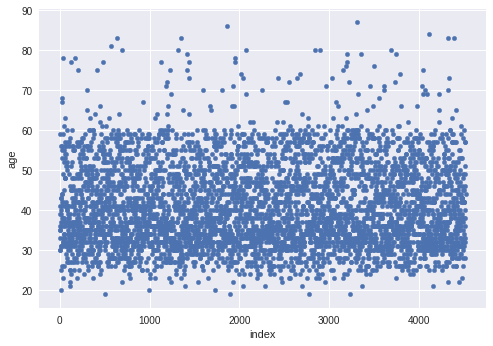

In [0]:
df.plot(kind = 'scatter',x ='index', y = 'age')

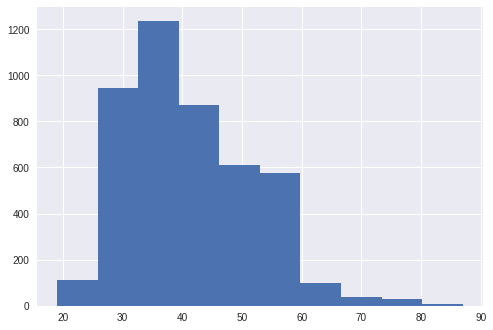

In [0]:
df['age'].hist()

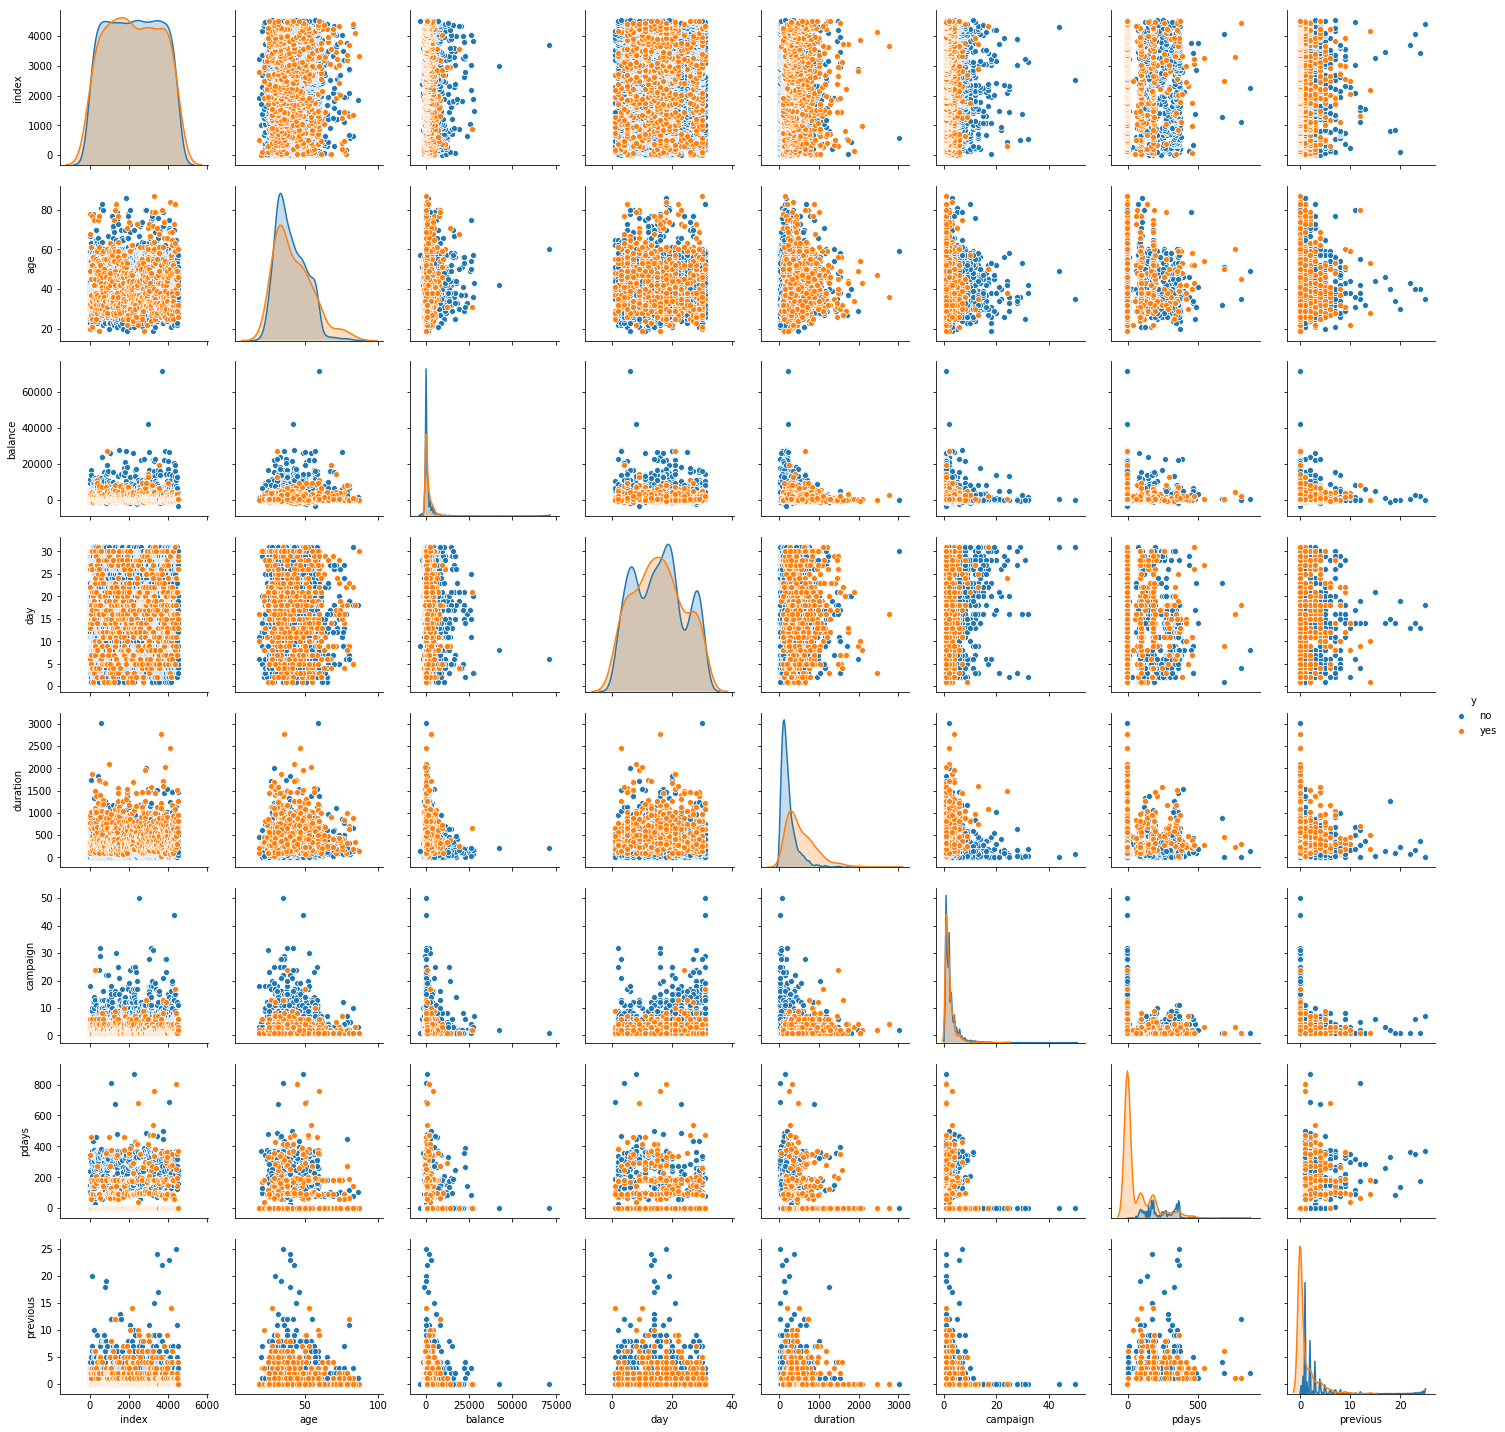

In [5]:
sns.pairplot(df, hue = "y")

We can seperate the object with 50 years old age out and plot other forms of table and image

In [0]:
df_age50 = df[df['age']==50]
df_age50.shape

(101, 18)

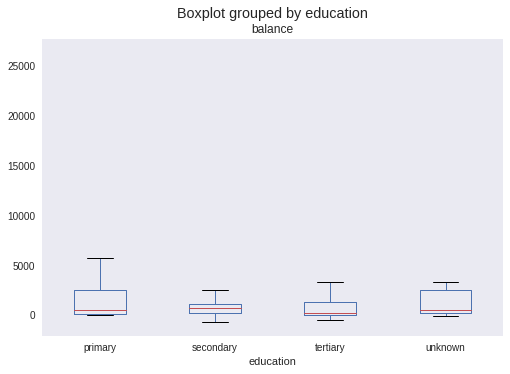

In [0]:
df_age50.boxplot(by = 'education', 
                column = ['balance'],
                grid = False)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.parallel_coordinates' is deprecated, import 'pandas.plotting.parallel_coordinates' instead.
  


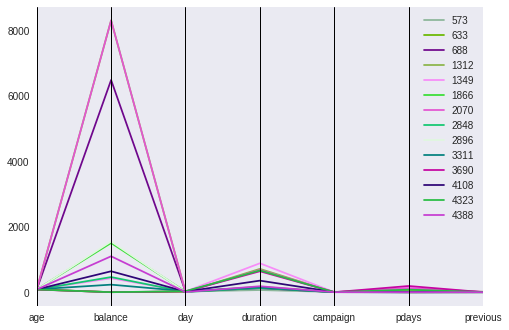

In [0]:
df_older_than_80 = df[df['age']>=80]
pd.tools.plotting.parallel_coordinates(df_older_than_80[['index','age', 'balance','day','duration','campaign','pdays','previous']],'index')